# Advanced Pandas

Here we discuss in detail how to manipulate DataFrames. We are going to explore how to reduce, process and join our datasets using various techniques. We also discuss about the features useful for both traditional statistical analyses and machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Merging Dataframes

In [2]:
# Lets create a dataframe
df = pd.DataFrame([{'Name': 'John Doe', 'Item Purchased': 'Dummy', 'Cost': 11.50},
                   {'Name': 'Mark Knophler', 'Item Purchased': 'Rudiger', 'Cost': 15.00},
                   {'Name': 'Benedict Cumberbatch', 'Item Purchased': 'Coffee', 'Cost': 7.49}],
                  index=['Store 1', 'Store 1', 'Store 2'])

# lets print our data frame
df

,Cost,Item Purchased,Name
Store 1,11.50,Dummy,John Doe
Store 1,15.00,Rudiger,Mark Knophler
Store 2,7.49,Coffee,Benedict Cumberbatch


In [3]:
# Lets add a new column on which date these items were purchased
df['Date'] = ['January 17', 'February 03', 'March 23']
df

,Cost,Item Purchased,Name,Date
Store 1,11.50,Dummy,John Doe,January 17
Store 1,15.00,Rudiger,Mark Knophler,February 03
Store 2,7.49,Coffee,Benedict Cumberbatch,March 23


In [4]:
# Lets add another column to mark if the item was delivered
df['Delivered'] = True
df

,Cost,Item Purchased,Name,Date,Delivered
Store 1,11.50,Dummy,John Doe,January 17,True
Store 1,15.00,Rudiger,Mark Knophler,February 03,True
Store 2,7.49,Coffee,Benedict Cumberbatch,March 23,True


In [5]:
# If we wanna add some new fields and values thats an easy task

# The problem arises when we need to add the values to only few places.
# In order to fulfil this we need to supply the list which is long enough as the dataframe;...
# ...so that, each row could be populated
# This means we have to add None values by ourselves

# For example
df['Feedback'] = [None, 'Good', 'Bad']
df

,Cost,Item Purchased,Name,Date,Delivered,Feedback
Store 1,11.50,Dummy,John Doe,January 17,True,None
Store 1,15.00,Rudiger,Mark Knophler,February 03,True,Good
Store 2,7.49,Coffee,Benedict Cumberbatch,March 23,True,Bad


In [6]:
# If each of the row has unique index then we can assign a new column indentifier to the series

# We reset the index here and the index will be labelled 0 though 2
adf = df.reset_index()

# We can create a new series with the new labels and the resul we get is applied to the respective columns
# Here we ignore the items(index-1) we don't know about and Pandas will put missing values for us 
adf['Date'] = pd.Series({0: 'February 28', 2: 'August 15'})
adf

,index,Cost,Item Purchased,Name,Date,Delivered,Feedback
0,Store 1,11.50,Dummy,John Doe,February 28,True,None
1,Store 1,15.00,Rudiger,Mark Knophler,NaN,True,Good
2,Store 2,7.49,Coffee,Benedict Cumberbatch,August 15,True,Bad


In [7]:
# Lets create two new datasets to perform operations on them

staff_df = pd.DataFrame([{'Name': 'Bongo', 'Role': 'Professor'},
                         {'Name': 'Dongo', 'Role': 'TA'},
                         {'Name': 'Jango', 'Role': 'Grader'}])

# Making Name as index
staff_df = staff_df.set_index('Name')

student_df = pd.DataFrame([{'Name': 'Jango', 'School': 'CS'},
                           {'Name': 'Chongo', 'School': 'ITM'},
                           {'Name': 'Dongo', 'School': 'Food Safety'}])
# Making Name as index
student_df = student_df.set_index('Name')

print(staff_df.head())
print()
print(student_df.head())

            Role
Name            
Bongo  Professor
Dongo         TA
Jango     Grader

             School
Name               
Jango            CS
Chongo          ITM
Dongo   Food Safety


In [8]:
# If we want to join two datasets its bit complex
# We use merge function to join two datasets
# We want to merge them using the values 'Name'
# merge(dataframe1, dataframe2) : this is how merge works

# Using merge to perform outer join query, and we use left and right indices as the joining columns
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
Bongo,Professor,NaN
Chongo,NaN,ITM
Dongo,TA,Food Safety
Jango,Grader,CS


In [9]:
# we see in the resulting dataframe above that Bongo and Chongo are not involved in...
# ...both work and studies but Donjo and Jango are
# For Bongo and Chongo the cells which are missing is listed as missing values

In [10]:
# If we want to have the intesection(Just those students who are also working) of the two dataframes ...
# ... we can set the 'how' attribute of the merge function to inner

pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Jango,Grader,CS
Dongo,TA,Food Safety


In [11]:
# We can see that in the resulting data frame only Jango and Dongo is there

In [12]:
# There are two more common cases in merging the dataframes
# They are also called as set addition

# If we want to get the list of all staff regarless of whether they are student or not
#        But if they are student we want to get the student details as well
# To do this we use the left join
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Bongo,Professor,NaN
Dongo,TA,Food Safety
Jango,Grader,CS


In [13]:
# If we want a list of all of the students and their roles if they were also staff
# To do this we would do a right join.
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
Jango,Grader,CS
Chongo,NaN,ITM
Dongo,TA,Food Safety


In [14]:
# We don't need the indices always to join the dataframes we can use the columns as well 
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()

In [15]:
# Merging based on the name column
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Bongo,Professor,NaN
1,Dongo,TA,Food Safety
2,Jango,Grader,CS


In [16]:
# What if we have conflicts between the dataframe???
# Lets create new dataframes to see how it works
# In the staff dataframe we add the office address and in the student dataframe ...
# ...we add the home address, but for both the dataframes the column heading is same

staff_df = pd.DataFrame([{'Name': 'Bongo', 'Role': 'Professor', 'Location': 'S State Street'},
                         {'Name': 'Dongo', 'Role': 'TA', 'Location': 'Stuart Building Basement'},
                         {'Name': 'Jango', 'Role': 'Grader', 'Location': 'Whisnick Hall'}])

student_df = pd.DataFrame([{'Name': 'Jango', 'School': 'CS', 'Location': 'Suburbs #104'},
                           {'Name': 'Chongo', 'School': 'ITM', 'Location': 'Downtown #205'},
                           {'Name': 'Dongo', 'School': 'Food Safety', 'Location': 'Lakeshore #306'}])

pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Location_x,Name,Role,Location_y,School
0,S State Street,Bongo,Professor,NaN,NaN
1,Stuart Building Basement,Dongo,TA,Lakeshore #306,Food Safety
2,Whisnick Hall,Jango,Grader,Suburbs #104,CS


In [17]:
# The merge function preserved the information of the location occuring in the different places...
# ...by appending _x and _y to the column name, to help differentiate between which ...
# ...index went with which columnof data
# _x is always the left dataframe(staff_df in this case) and the ...
# ..._y is always the right dataframe information
# We can control the column names as well by changing the suffixes paramertes from the definition below
# DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)[source]


In [18]:
#Multi indexing and multiple columns

# Its possible that first name of student and staff might overlap but the last name might not

staff_df_new = pd.DataFrame([{'First Name': 'Bongo', 'Last Name': 'Yaga','Role': 'Professor'},
                         {'First Name': 'Dongo', 'Last Name': 'Baba','Role': 'TA'},
                         {'First Name': 'Jango', 'Last Name': 'Yolo','Role': 'Grader'}])

student_df_new = pd.DataFrame([{'First Name': 'Jango', 'Last Name': 'Naka','School': 'CS'},
                           {'First Name': 'Chongo', 'Last Name': 'Bolo','School': 'ITM'},
                           {'First Name': 'Dongo', 'Last Name': 'Baba','School': 'Food Safety'}])

print(staff_df_new, '\n\n')
print(student_df_new)

  First Name Last Name       Role
0      Bongo      Yaga  Professor
1      Dongo      Baba         TA
2      Jango      Yolo     Grader 


  First Name Last Name       School
0      Jango      Naka           CS
1     Chongo      Bolo          ITM
2      Dongo      Baba  Food Safety


In [19]:
# In this case, we use a list of the multiple columns that should be used to join keys ...
# ...on the left_on and right_on parameters.

# list of the multiple columns = ['First Name','Last Name']

pd.merge(staff_df_new, student_df_new, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Dongo,Baba,TA,Food Safety


___________________________

## Idiomatic Pandas

Best solutions to the problems, which can be solved in several other ways.<br/>
And Idiomatic solutions have both <b>high performance</b> and <b>high readability</b>.
<br/>...<br/>
Pandas also has its own sets of idioms.<br/>
Several developers and users in the pandas community have used the term <b>Pandorable</b> for these idioms.<br/>
We will discuss some of the features to make our code Pandorable. 

##### Method Chaning
Every method on an object returns a reference to that object.<br/>
Using this we can condense many different operations on a DataFrame, for instance, into one line or at least one statement of code.

Here is an example:

In [20]:
# Let us load a new dataset to work with
census_df = pd.read_csv('census.csv')
census_df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [21]:
census_df.shape

(3193, 100)

In [22]:
# This is method chaning, first we write a where query...
# ...then a dropna, then a set index and then a rename, 
# We don't have any in place flag being used in this code

(census_df.where(census_df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [23]:
# This is the trational way of writing the same code

census_df = census_df[census_df['SUMLEV']==50]
census_df.set_index(['STNAME','CTYNAME'], inplace=True)
census_df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County          50       3         6      1       1   
          Baldwin County          50       3         6      1       3   
          Barbour County          50       3         6      1       5   
          Bibb County             50       3         6      1       7   
          Blount County           50       3         6      1       9   
          Bullock County          50       3         6      1      11   
          Butler County           50       3         6      1      13   
          Calhoun County          50       3         6      1      15   
          Chambers County         50       3         6      1      17   
          Cherokee County         50       3         6      1      19   
          Chilton County          50       3         6      1      21   
          Choctaw County          50       3         6      1      23   
          Clarke County           50       3         6      1      25   
          Clay County             50       3         6      1      27   
          Cleburne County         50       3         6      1      29   
          Coffee County           50       3         6      1      31   
          Colbert County          50       3         6      1      33   
          Conecuh County          50       3         6      1      35   
          Coosa County            50       3         6      1      37   
          Covington County        50       3         6      1      39   
          Crenshaw County         50       3         6      1      41   
          Cullman County          50       3         6      1      43   
          Dale County             50       3         6      1      45   
          Dallas County           50       3         6      1      47   
          DeKalb County           50       3         6      1      49   
          Elmore County           50       3         6      1      51   
          Escambia County         50       3         6      1      53   
          Etowah County           50       3         6      1      55   
          Fayette County          50       3         6      1      57   
          Franklin County         50       3         6      1      59   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County         50       2         3     55     129   
          Washington County       50       2         3     55     131   
          Waukesha County         50       2         3     55     133   
          Waupaca County          50       2         3     55     135   
          Waushara County         50       2         3     55     137   
          Winnebago County        50       2         3     55     139   
          Wood County             50       2         3     55     141   
Wyoming   Albany County           50       4         8     56       1   
          Big Horn County         50       4         8     56       3   
          Campbell County         50       4         8     56       5   
          Carbon County           50       4         8     56       7   
          Converse County         50       4         8     56       9   
          Crook County            50       4         8     56      11   
          Fremont County          50       4         8     56      13   
          Goshen County           50       4         8     56      15   
          Hot Springs County      50       4         8     56      17   
          Johnson County          50       4         8     56      19   
          Laramie County          50       4         8     56      21   
          Lincoln County          50       4         8     56      23   
          Natrona County          50       4         8     56      25   
          Niobrara County         50       4         8     56      27   
          Park County             50       4         8     56      29   
          Platt

##### MAP

Map is sort of a basis for functional programming in the language.<br/> 
When we want to use map in Python, we pass it some function we want to be called, and some iterable, like a list, to which we want the function to be applied to.<br/>
The results are that the function is called against each item in the list, and there's a resulting list of all of the evaluations of that function. 

In [24]:
# Let us write a function which takes a row of data and finds its minimum and ...
# ...maximum values and returns a new row of data

def minMax(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015'
        ]]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [25]:
# Then we need to call apply on the DataFrame.
# Apply takes the function and the axis on which to operate as parameters.

# axis =1 applies across all index of the rows(parameter of the index)
census_df.apply(minMax, axis=1)

max       min
STNAME    CTYNAME                               
Alabama   Autauga County       55347.0   54660.0
          Baldwin County      203709.0  183193.0
          Barbour County       27341.0   26489.0
          Bibb County          22861.0   22512.0
          Blount County        57776.0   57373.0
          Bullock County       10887.0   10606.0
          Butler County        20944.0   20154.0
          Calhoun County      118437.0  115620.0
          Chambers County      34153.0   33993.0
          Cherokee County      26084.0   25859.0
          Chilton County       43943.0   43665.0
          Choctaw County       13841.0   13170.0
          Clarke County        25767.0   24675.0
          Clay County          13880.0   13456.0
          Cleburne County      15072.0   14921.0
          Coffee County        51211.0   50177.0
          Colbert County       54514.0   54354.0
          Conecuh County       13208.0   12662.0
          Coosa County         11758.0   10724.0
          Covington County     38060.0   37796.0
          Crenshaw County      13963.0   13853.0
          Cullman County       82005.0   80374.0
          Dale County          50358.0   49501.0
          Dallas County        43803.0   41131.0
          DeKalb County        71387.0   70869.0
          Elmore County        81468.0   79465.0
          Escambia County      38309.0   37784.0
          Etowah County       104442.0  103057.0
          Fayette County       17231.0   16759.0
          Franklin County      31734.0   31507.0
...                                ...       ...
Wisconsin Washburn County      15930.0   15552.0
          Washington County   133674.0  131967.0
          Waukesha County     396488.0  390076.0
          Waupaca County       52422.0   51945.0
          Waushara County      24581.0   24033.0
          Winnebago County    169639.0  167059.0
          Wood County          74807.0   73435.0
Wyoming   Albany County        37956.0   36428.0
          Big Horn County      12022.0   11672.0
          Campbell County      49220.0   46244.0
          Carbon County        15856.0   15559.0
          Converse County      14343.0   13728.0
          Crook County          7444.0    7114.0
          Fremont County       41129.0   40222.0
          Goshen County        13666.0   13383.0
          Hot Springs County    4846.0    4741.0
          Johnson County        8636.0    8552.0
          Laramie County       97121.0   92271.0
          Lincoln County       18722.0   17943.0
          Natrona County       82178.0   75472.0
          Niobrara County       2548.0    2475.0
          Park County          29237.0   28259.0
          Platte County         8812.0    8678.0
          Sheridan County      30020.0   29146.0
          Sublette County      10418.0    9899.0
          Sweetwater County    45162.0   43593.0
          Teton County         23125.0   21297.0
          Uinta County         21102.0   20822.0
          Washakie County       8545.0    8316.0
          Weston County         7234.0    7065.0

[3142 rows x 2 columns]

In [26]:
#  If the purpose of this is as part of data cleaning then we are likely to find yourself wanting to ...
# ...add new data to the existing DataFrame. In that case we may just take the row values and ...
# ...add in new columns indicating the max and minimum scores. 

def minMax(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
census_df.apply(minMax, axis=1)

#This appends the min and max at the end of the table

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [27]:
# Here's a one line example of how to calculate the max of the columns using the apply function. 
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
census_df.apply(lambda x: np.max(x[rows]), axis=1)

STNAME     CTYNAME           
Alabama    Autauga County         55347.0
           Baldwin County        203709.0
           Barbour County         27341.0
           Bibb County            22861.0
           Blount County          57776.0
           Bullock County         10887.0
           Butler County          20944.0
           Calhoun County        118437.0
           Chambers County        34153.0
           Cherokee County        26084.0
           Chilton County         43943.0
           Choctaw County         13841.0
           Clarke County          25767.0
           Clay County            13880.0
           Cleburne County        15072.0
           Coffee County          51211.0
           Colbert County         54514.0
           Conecuh County         13208.0
           Coosa County           11758.0
           Covington County       38060.0
           Crenshaw County        13963.0
           Cullman County         82005.0
           Dale County            50358.0
    

___________________

## Group By

This function takes some column name or names and splits the DataFrame up into chunks based on those names.<br/>
It returns a DataFrame groupby object. Which can be iterated upon, and then returns a tuple where the first item is the <b>group condition</b>, and the second item is the <b>data frame</b> reduced by that grouping. <br/>
Since it's made up of two values, we can unpack this, and project just the column that we are interested in, to calculate the average. 

In [28]:
# Let's load the census dataset to perform our operations on

df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50] #Exclude the state level summarizations, which had a sum level value of 40.
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [29]:
%%timeit -n 10
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state '+state+' have an average population of '+str(avg))

Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in stat

In [30]:
# Here we get the list of unique states, then for all the states we reduce ...
# ...the dataframe and calculate the average

# After timing the above function we notice that it takes 703 ms per loop

In [31]:
%%timeit -n 10


# Lets do the same thing using a smarter approach by using a groupby object

# we tell pandas that we are interested in grouping by the state name
for group, frame in df.groupby('STNAME'):
# Then we calculate the average using just one column and all of the date in that column    
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state '+group+' have an average population of '+str(avg))    

# When we time it we see a huge difference here

Counties in state Alabama have an average population of 71339.3432836
Counties in state Alaska have an average population of 24490.7241379
Counties in state Arizona have an average population of 426134.466667
Counties in state Arkansas have an average population of 38878.9066667
Counties in state California have an average population of 642309.586207
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.567164
Counties in state Georgia have an average population of 60928.6352201
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.8636364
Counties in state Illinois have an average population of 125790.509804
Counties in stat

In [32]:
# After timing the above function we notice that it only takes 13.4 ms per loop

In [33]:
# Most of the time we use group by in columns
# But we can use functions to groupby as well, and use that to segment our data

# For example lets say we have a huge dataset of census data to work with and we want ...
# ... to work with only one third of the dataset at the begning

# For that we can create a function which returns a number between 0 and 2 based on...
# ...the first character of the statement, then we tell groupby to use thi function to split our dataframe



# In order to do this we need to set the index of the DataFrame to be the column that we want to group by first 
df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':  #if the first letter of the parameter is 'M', we return 0
        return 0
    if item[0]<'Q':  #if its Q we return a 1
        return 1
    return 2         #other wise we return 2

# Then we pass this function to the dataframe apply, and see that our dataframe is segmented by the number
for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')



There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [34]:
# Lets load the dataset once again
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [35]:
# Agg method applies a function to the column or columns of data in the group, and returns the results
# We pass in a dictionary of the column names we are interested in and the function we wanna apply

# Here we build a summary DataFrame for the average populations per state, ...
# ...we just give agg a dictionary with the Census 2010 pop key and the NumPy average function
df.groupby('STNAME').agg({'CENSUS2010POP': np.average}).head(9)  #we just display the 9 rows using the head()

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [36]:
# There is a difference on how do we pass the keys on the dictionary
# there are two groupby objects which exists ...
# ...the dataframe grouby and the series groupby

print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

# And they beahve differently with aggregate

<class 'pandas.core.groupby.DataFrameGroupBy'>
<class 'pandas.core.groupby.SeriesGroupBy'>


In [37]:
# for instance 
# We take our census dataframe and convert it into series passing statename as the index...
# ...and only column as CENSUS2010POP, then we group this by index using a level parameter
# Then we call the agg method on the dictionary which has numpy sum and average functions
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum}))

# Since there is only one column of data it applies it to the both column and prints

,avg,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956
Colorado,78581.187500,5029196
Connecticut,446762.125000,3574097
Delaware,299311.333333,897934
District of Columbia,601723.000000,601723


In [38]:
# We can do the same thing as above in the dataframe instead of a series

# We set the index to be the state name, we group by the index, ...
# ..and we project TWO columns. The population estimate in 2010, and the population estimate in 2011. 

(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum}))
# We see that after calling agg with two parameters it creates a nice table with our functions applied

avg                             sum  \
                     POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010   
STNAME                                                                 
Alabama                 71420.313433    71658.328358         4785161   
Alaska                  24621.413793    24921.379310          714021   
Arizona                427213.866667   431248.800000         6408208   
Arkansas                38965.253333    39180.506667         2922394   
California             643691.017241   650000.586207        37334079   
Colorado                78878.968750    79991.875000         5048254   
Connecticut            447464.625000   448719.875000         3579717   
Delaware               299930.333333   302638.666667          899791   
District of Columbia   605126.000000   620472.000000          605126   
Florida                281341.641791   285157.208955        18849890   
Georgia                 61090.905660    61712.452830         9713454   
Hawaii                 272796.000000   275645.400000         1363980   
Idaho                   35704.227273    36003.045455         1570986   
Illinois               125894.598039   126096.882353        12841249   
Indiana                 70549.891304    70835.271739         6490590   
Iowa                    30815.090909    30963.525253         3050694   
Kansas                  27226.895238    27332.542857         2858824   
Kentucky                36232.808333    36399.016667         4347937   
Louisiana               71014.859375    71490.328125         4544951   
Maine                   82980.937500    83016.062500         1327695   
Maryland               241183.708333   243507.125000         5788409   
Massachusetts          468931.142857   472271.214286         6565036   
Michigan               119004.445783   118995.048193         9877369   
Minnesota               61044.862069    61472.632184         5310903   
Mississippi             36223.365854    36317.060976         2970316   
Missouri                52139.582609    52265.973913         5996052   
Montana                 17690.053571    17816.892857          990643   
Nebraska                19677.688172    19810.569892         1830025   
Nevada                 159025.882353   159930.529412         2703440   
New Hampshire          131670.800000   131834.400000         1316708   
New Jersey             419232.428571   421092.095238         8803881   
New Mexico              62567.909091    62976.545455         2064741   
New York               312950.322581   314890.354839        19402920   
North Carolina          95589.790000    96510.250000         9558979   
North Dakota            12726.981132    12930.679245          674530   
Ohio                   131145.068182   131198.204545        11540766   
Oklahoma                48825.922078    49176.961039         3759596   
Oregon                 106610.333333   107458.583333         3837972   
Pennsylvania           189731.552239   190226.895522        12712014   
Rhode Island           210643.800000   210371.200000         1053219   
South Carolina         100780.304348   101581.152174         4635894   
South Dakota            12368.166667    12489.227273          816299   
Tennessee               66911.421053    67351.663158         6356585   
Texas                   99387.255906   101001.826772        25244363   
Utah                    95704.344828    97118.620690         2775426   
Vermont                 44713.142857    44763.357143          625984   
Virginia                60344.263158    60983.330827         8025787   
Washington             172898.974359   174954.589744         6743060   
West Virginia           33713.181818    33726.327273         1854225   
Wisconsin               79030.611111    79301.666667         5690204   
Wyoming                 24544.173913    24685.565217          564516   

                                      
                     POPESTIMATE2011  
STNAME                                
Alabama                    

In [39]:
# there might be confusion if we change the labels of the dictionary we pass ..
# ...to agg to correspond to the labels of the dataframe

# in this case pandas recognizes its the same and it maps the fucntions directly ...
# ..to the columns instead of creating a hierachical labelled columns

(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034
Colorado,78878.968750,5119480
Connecticut,447464.625000,3589759
Delaware,299930.333333,907916
District of Columbia,605126.000000,620472


In [40]:
# this may a odd behaviour and this is not we might be expecting from pandas ...
# ...so we should be aware of this fact when using the agg function

## Scales

In [41]:
# Lets create a dataframe of letter grades in descending order 
# And lets set the index value of the course grain measure

df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [42]:
# Now when we instruct Pandas to render this as categorical data, we see that the ...
# ...dtype has been set as category and that there are 11 different categories. 
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [43]:
# If we want to indicate to Pandas that this data is in a logical order, ...
# ...we pass the ordered=True flag and we see that’s reflected in the category dtype using the less than sign.
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [44]:
# If we have our list of grades and we compared them with a C. ...
# If we did this lexographically, we would that a C+ and a C- are both actually greater than a C. 

grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

In [45]:
# What can we do with this???
#         - Ordinal data has ordering and can be used for boolean masking

In [46]:
# The cut function can be useful for going from a continuous variable to a categorical variable. 
# For example, cut could convert ages to groups of age ranges.

# Any NA values will be NA in the result. Out of bounds values will be NA in the resulting Categorical object

# Here is an example
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})
pd.cut(df['avg'],10)

STNAME
Alabama                  (11706.0871, 75333.413]
Alaska                   (11706.0871, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                 (11706.0871, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                  (11706.0871, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                    (11706.0871, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                  (11706.0871, 75333.413]
Iowa                     (11706.0871, 75333.413]
Kansas                   (11706.0871, 75333.413]
Kentucky                 (11706.0871, 75333.413]
Louisiana                (11706.0871, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

## Pivot Tables

Pivot table is a way of summarizing the data in a dataframe and it uses agg function a lot.<br/>
A Pivot table is itself a dataframe where rows represents one variable and the columns another, and the cells contain some aggregate value.<br/>
A pivot table also tends to includes marginal values as well, which are the sums for each column and row. This allows us to be able to see the relationship between two variables at just a glance. 

In [50]:
# Lets load a dataset to implement some of the features of pivot table
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
cars_df = pd.read_csv('cars.csv')

In [51]:
# Printing the first five columns
cars_df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,n/a,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7


<i>This data set comes from the Open Data Initiative of the Canadian government. And has information about the efficiency of different electric cars which are available for purchase. When we look at the head of the data frame, we'll see that there are model years, vendors, sizes of cars, and statistics, like how big the battery is in kilowatt hours.<i/>

In [52]:
#  A pivot table allows us to pivot out one of these columns into a new column headers and ...
# ...compare it against another column as row indices.

# For instance, let's say we wanted to compare the makes of electric vehicles versus the years ...
# ...and that we wanted to do this comparison in terms of battery capacity

# To do this, ...
# 1. We tell pandas we want the values to be kilowatts, the index to be the year and the columns to be the make. 
# 2. Then we specify that the aggregation function, and here we'll use the NumPy mean. 

cars_df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [53]:
# We see there are NaN values for vendors who didn't have an entry in a given year like Ford in 2012. 
# And we see that most vendors don't have a change in battery capacity over the years, ...
# except for Tesla, as they've introduced several new models.

In [55]:
# Pivot tables aren't limited to only one function.
# We can pass aggfunc, a list of the different functions to apply, and pandas will provide us ...
# ...with the result using hierarchical column names. 
# Here, we’ll also pass margins equals true

cars_df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.min, np.max], margins = True)

amin                                                              \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   All   
YEAR                                                                      
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN  49.0   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0  35.0   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0  35.0   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0  35.0   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0  35.0   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0  35.0   

       amax                                                               
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA    All  
YEAR                                                                      
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   80.0  
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  310.0  310.0  
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  310.0  310.0  
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  515.0  515.0  
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  568.0  568.0  
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  568.0  568.0

In [57]:
# Printing only the mean values
cars_df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean], margins = True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                  
Make         All  
YEAR              
2012   64.500000  
2013  158.444444  
2014  135.000000  
2015  181.428571  
2016  252.263158  
All   190.622642

______

## Date Functionality in Pandas

pandas has proven very successful as a tool for working with time series data, especially in the financial data analysis space. Using the NumPy datetime64 and timedelta64 dtypes, we have consolidated a large number of features from other Python libraries like scikits.timeseries as well as created a tremendous amount of new functionality for manipulating time series data.

### Timestamp
Timestamp represents a single timestamp and associates values with points in time. 

In [60]:
# For example, let's create a timestamp using a string 10/03/2017 15:18PM
pd.Timestamp('10/03/2017 03:18PM')

Timestamp('2017-10-03 15:18:00')

### Period
If we weren't interested in a specific point in time, and instead wanted a span of time. This is where Period comes into play. Period represents a single time span, such as a specific day or month.

In [61]:
# Here we are creating a Period that is March 2017
pd.Period('03/2017')

Period('2017-03', 'M')

In [63]:
# And here's an example of a Period that is March 10th, 2017.
pd.Period('10/03/2017')

Period('2017-10-03', 'D')

### DatetimeIndex
The index of a timestamp is DatetimeIndex. 

In [67]:
# Here is an example
# First, let's create our example series t1, we'll use the timestamp of March 1st, 2nd and 3rd of 2017. 
t1 = pd.Series(list('abc'), [pd.Timestamp('2017-03-01'), pd.Timestamp('2017-03-02'), pd.Timestamp('2017-03-03')])
t1

2017-03-01    a
2017-03-02    b
2017-03-03    c
dtype: object

In [68]:
# When we look at the series, each timestamp is the index and has a value associated ...
# ...with it, in this case is, a, b and c. 

# Looking at the type of our series index, we see that it's DatetimeIndex.
type(t1.index)

pandas.tseries.index.DatetimeIndex

### PeriodIndex
As explained above; similarly, the index of Period is PeriodIndex.

In [69]:
#  Let's create another example series t2. This time, we'll use the values d, e, and f and ...
# ...match them with the Period March, April and Mary 2017

t2 = pd.Series(list('def'), [pd.Period('2016-03'), pd.Period('2016-04'), pd.Period('2016-05')])
t2


2016-03    d
2016-04    e
2016-05    f
Freq: M, dtype: object

In [70]:
# Looking at the type of the ts2.index, we can see that it's PeriodIndex. 
type(t2.index)

pandas.tseries.period.PeriodIndex

### Converting to Datetime
Converts argument to datetime

In [77]:
# If we have a list of dates as strings. If we create a DataFrame using these dates as the index, ...
# ...and some minimally generated data, this is the DataFrame we get. 

d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,53,38
"Aug 29, 2014",16,80
2015-06-26,13,49
7/12/16,48,73


In [78]:
# Looking above at the index we can see that's pretty messy and the dates are all in different formats. 
# Using pandas to_datetime, pandas will try to convert these to Datetime and put them in a standard format. 
# to_datetime also has options to change the date parse order.

ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,53,38
2014-08-29,16,80
2015-06-26,13,49
2016-07-12,48,73


In [80]:
# We can pass in the argument dayfirst = True to parse the date in European date format
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

###  Timedeltas 
Timedeltas are differences in times.

In [81]:
# We can see that when we take the difference between March 3rd and March 1st. 
# We get a Timedelta of two days. 

pd.Timestamp('3/3/2016')-pd.Timestamp('3/1/2016')

Timedelta('2 days 00:00:00')

In [83]:
# We can also do something like find what the date and ...
# ...time is for 12 days and three hours past March 2nd, at 8:10 AM. 

pd.Timestamp('3/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-03-14 11:10:00')

### Dates in a Dataframe
Let's look at a few tricks for working with dates in a DataFrame. 

In [84]:
# Suppose we want to look at nine measurements, taken bi-weekly, every Sunday. Starting in March 2017.

dates = pd.date_range('03-01-2017', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2017-03-05', '2017-03-19', '2017-04-02', '2017-04-16',
               '2017-04-30', '2017-05-14', '2017-05-28', '2017-06-11',
               '2017-06-25'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [85]:
#  Let's create DataFrame using these dates, and some random data, and see what we can do with it. 

df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2017-03-05,96,116
2017-03-19,98,115
2017-04-02,106,119
2017-04-16,115,124
2017-04-30,122,122
2017-05-14,126,126
2017-05-28,121,119
2017-06-11,122,117
2017-06-25,129,119


In [86]:
# We can check what day of the week a specific date is. 
# For example, here we can see that all the dates in our index are on a Sunday. 
df.index.weekday_name

array(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'], dtype=object)

In [88]:
# We can use diff to find the difference between each date's value. 
# Suppose we wanted to know what the mean count is for each month in our DataFrame. We can do this using resample. 
df.diff()

,Count 1,Count 2
2017-03-05,NaN,NaN
2017-03-19,2.0,-1.0
2017-04-02,8.0,4.0
2017-04-16,9.0,5.0
2017-04-30,7.0,-2.0
2017-05-14,4.0,4.0
2017-05-28,-5.0,-7.0
2017-06-11,1.0,-2.0
2017-06-25,7.0,2.0


In [90]:
df['2017']

,Count 1,Count 2
2017-03-05,96,116
2017-03-19,98,115
2017-04-02,106,119
2017-04-16,115,124
2017-04-30,122,122
2017-05-14,126,126
2017-05-28,121,119
2017-06-11,122,117
2017-06-25,129,119


In [92]:
df['2017-06']

,Count 1,Count 2
2017-06-11,122,117
2017-06-25,129,119


In [93]:
df['2017-05':]

,Count 1,Count 2
2017-05-14,126,126
2017-05-28,121,119
2017-06-11,122,117
2017-06-25,129,119


In [94]:
#  We can also change the frequency of our dates in our DataFrame using asfreq. 
# If we use this to change the frequency from bi-weekly to weekly We'll end up with missing values every other week. 
# So let's use the forward fill method on those missing values. 

df.asfreq('W', method='ffill')

,Count 1,Count 2
2017-03-05,96,116
2017-03-12,96,116
2017-03-19,98,115
2017-03-26,98,115
2017-04-02,106,119
2017-04-09,106,119
2017-04-16,115,124
2017-04-23,115,124
2017-04-30,122,122
2017-05-07,122,122


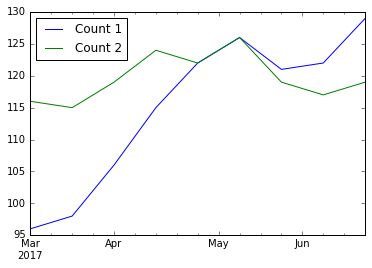

In [95]:
# Importing matplotlib.pyplot, and using the iPython magic %matplotlib inline(already done in line 1), ...
# ...will allow us to visualize the time series.
df.plot()

<a href="https://www.coursera.org/learn/python-data-analysis/home/welcome">Courtesy</a>